In [2]:
import pandas as pd

il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiedere di utilizzare il dataset, curato da Our World in Data, all'indirizzo tot e tot
-Si richiede di verificare le dimensioni del dataset e i relativi metadati
-si chiede poi per ogni continente di trovare il numero dei casi totali avvenuti in quello stesso continente, si chiede di non connsiderare eventuali locazioni che nel dataset non appartengono ad alcun continente.
-Sempre riguardo i casi totali, si chiede di scriveere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media e percentuale rispetto al numero nel mondo (calcolati anche sulle locazioni senza indicazione di continente.
-Selezionare i dati relativi all'italia nel 2022, e mostrare con un grafico adeguato l'evoluzione dei casi totalirispetto alla data. mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali.
Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza  tra queste nazioni riguardo il  numero di pazienti in terapia intensiva da maggio 2022 incluso, ad aprile 2023 incluso e scrivere un breve commento a riguardo;
-riguardo le nazioni di italia , Germania Francia e spagna nel 2023 , mostrare la somma dei pazienti ospitalizzati  per ognuna, se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [1]:
##DOMANDA UNO
#Si richiede di verificare le dimensioni del dataset e i relativi metadati 

per prima cosa importo il dataset

In [27]:
import pandas as pd
df = pd.read_csv("owid-covid-data.csv", delimiter=',')
#conto righe e colonne
conteggio_tot=df.shape
metadati = df.dtypes
print(f"numero di righe e colonne: ")
print(conteggio_tot)
print(f"memory usage")
print(df.memory_usage())
print(f"metadati: ")
print(metadati)
print(f"nomi colonne")
print(df.columns)
print(f"info")
print(df.info)

numero di righe e colonne: 
(429435, 67)
memory usage
Index                                           72
iso_code                                   1717740
continent                                  1717740
location                                   1717740
date                                       1717740
                                            ...   
population                                 3435480
excess_mortality_cumulative_absolute       3435480
excess_mortality_cumulative                3435480
excess_mortality                           3435480
excess_mortality_cumulative_per_million    3435480
Length: 68, dtype: int64
metadati: 
iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 

In [39]:
## DOMANDA DUE

si chiede poi per ogni continente di trovare il numero dei casi totali avvenuti in quello stesso continente, si chiede di non connsiderare eventuali locazioni che nel dataset non appartengono ad alcun continente.

In [2]:
#importo la libreria Pandas
import pandas as pd
#apro il dataframe
df = pd.read_csv("owid-covid-data.csv", delimiter=',')
#riassemblo il dataframe con i dati di mio interesse
df = df[["continent", "total_cases"]]
#raggruppo per continente e sommo i casi totali
df2 = df.groupby("continent")["total_cases"].sum().reset_index()
print(df2)

       continent   total_cases
0         Africa  1.461689e+10
1           Asia  2.521673e+11
2         Europe  2.367567e+11
3  North America  1.270737e+11
4        Oceania  1.159805e+10
5  South America  7.348457e+10


In [3]:
#Mi accorgo che Nord America e Sud America non sono continenti a se stanti e li elimino come da traccia:
df3= df2.loc[df2["continent"].isin(["Africa","Asia","Europe","Oceania"])]
print(df3)

  continent   total_cases
0    Africa  1.461689e+10
1      Asia  2.521673e+11
2    Europe  2.367567e+11
4   Oceania  1.159805e+10


In [131]:
#DOMANDA TRE


In [42]:
#SEMPRE RIGUARDO I CASI TOTALI, SI RICHIEDE DI SCRIVERE DEL CODICE CHE DATE DUE VARIABILI  CONTENENTI I NOMI DI CONTINENTI NE CONFRONTI I SEGUENTI RELATIVI
#DESCRITTORI STATISTICI: VALORE MASSIMO, MEDIA E PERCENTUALE RISPETTO AL NUMERO DEI CASI TOTALI NEL MONDO CALCOLATI
#ANCHE SULLE LOCAZIONI SENZA INDICAZIONI DI CONTINENTE

In [18]:
#importo pandas
import pandas as pd

In [4]:
#apro il dataframe
df = pd.read_csv("owid-covid-data.csv", delimiter=',')

In [8]:
# Funzione per confrontare i continenti
def confronta_cont(cont1, cont2):
    dati_cont1 = df[df['continent'] == cont1]
    dati_cont2 = df[df['continent'] == cont2]
    casi_totali_mondo = df['total_cases'].sum()
    max_cont1 = dati_cont1['total_cases'].max()
    mean_cont1 = dati_cont1['total_cases'].mean()
    percentuale_cont1 = (dati_cont1['total_cases'].sum() / casi_totali_mondo) * 100
    max_cont2 = dati_cont2['total_cases'].max()
    mean_cont2 = dati_cont2['total_cases'].mean()
    percentuale_cont2 = (dati_cont2['total_cases'].sum() / casi_totali_mondo) * 100
    risultati = {
        cont1: {
            'Valore massimo': max_cont1,
            'Media': mean_cont1,
            'Percentuale rispetto a tutti i casi del mondo': percentuale_cont1
        },
        cont2: {
            'Valore Massimo': max_cont2,
            'Media': mean_cont2,
            'Percentuale rispetto a tutti i casi del mondo': percentuale_cont2
        }
    }

    return risultati
    
c1 = 'Europe'
c2 = 'Asia'
risultati = confronta_cont(c1, c2)
print(risultati)


{'Europe': {'Valore massimo': 38997490.0, 'Media': 2773170.803183639, 'Percentuale rispetto a tutti i casi del mondo': 7.805876897317327}, 'Asia': {'Valore Massimo': 99373219.0, 'Media': 3205054.9991865577, 'Percentuale rispetto a tutti i casi del mondo': 8.313966056973133}}


In [4]:
##SELEZIONARE I DATI RELATIVI ALL'ITALIA DEL 2022 
#DIMOSTRARE CON UN GRAFICO ADEGUATO L'EVOLUZIONE DEI CASI TOTALI RISPETTO ALLA DATA, 
#MOSTRARE POI CON UN GRAFICO ADEGUATO IL NUMERO DI NUOVI CASI RISPETTO ALLA DATA
##FILTRARE I DATI SE NECESSARIO
##MOSTRARE INFINE UN GRAFICO CHE MOSTRA L'ANDAMENTO DELLA SOMMA CUMULATIVA NUOVI CASI DEL 2022
#E COMMENTARE SE CI SONO SIMILARITà CON L'ANDAMENTO DEI NUMERI CASI TOTALI

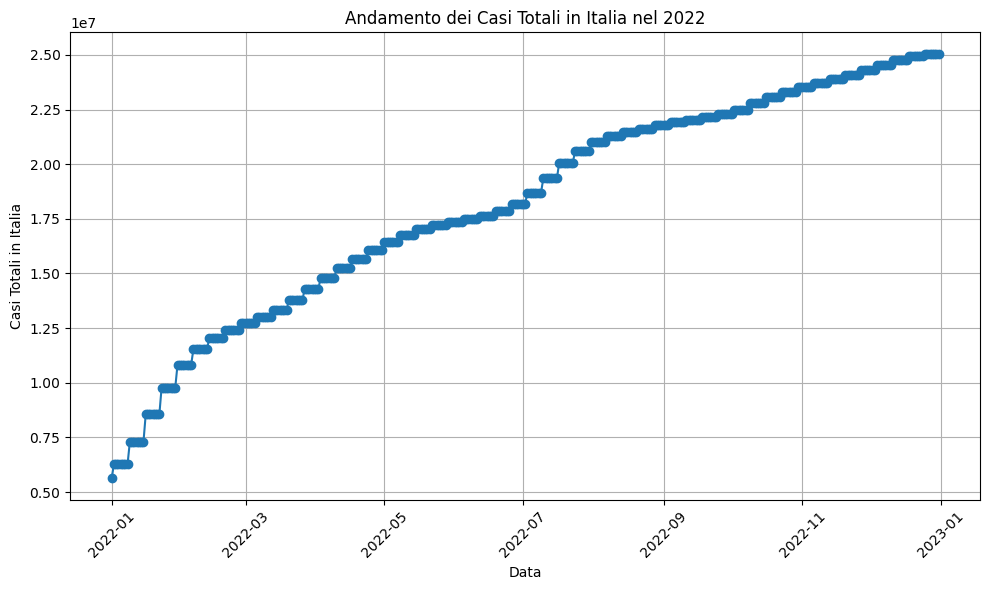

In [17]:
#ANDAMENTO CASI TOTALI 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
df_italia = df[df['location'] == 'Italy']
dati_italia_2022 = df_italia[df_italia['date'].dt.year == 2022]
andamento_casi_italia = dati_italia_2022.groupby('date')['total_cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(andamento_casi_italia['date'], andamento_casi_italia['total_cases'], marker='o', linestyle='-')
plt.title('Andamento dei Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali in Italia')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


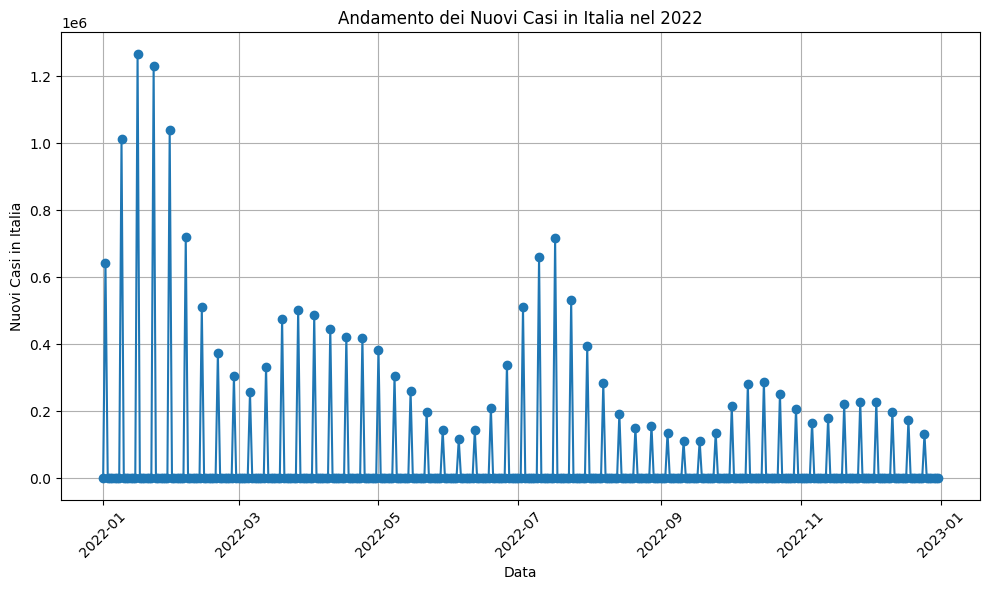

In [8]:
#Andamento dei Nuovi Casi
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
df_italia = df[df['location'] == 'Italy']
dati_italia_2022 = df_italia[df_italia['date'].dt.year == 2022]
andamento_nuovi_casi_italia = dati_italia_2022.groupby('date')['new_cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(andamento_nuovi_casi_italia['date'], andamento_nuovi_casi_italia['new_cases'], marker='o', linestyle='-')
plt.title('Andamento dei Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi in Italia')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


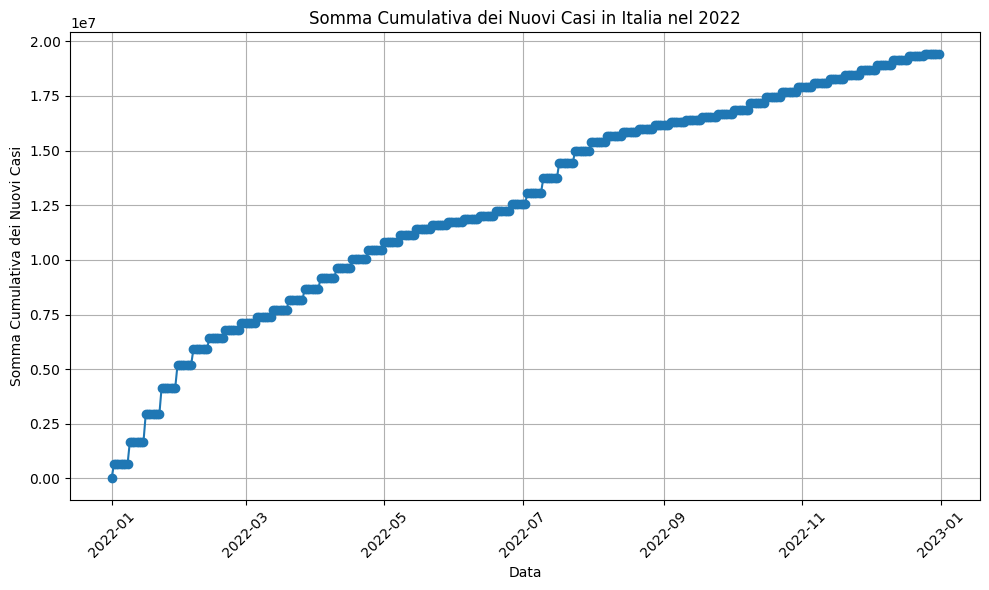

In [16]:
#somma cumulativa nuovi casi
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
df_italia = df[df['location'] == 'Italy']
dati_italia_2022 = df_italia[df_italia['date'].dt.year == 2022]
cumul_nuovi_ita = dati_italia_2022.groupby('date')['new_cases'].sum().reset_index()
cumul_nuovi_ita['cumulative_new_cases'] = cumul_nuovi_ita['new_cases'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(cumul_nuovi_ita['date'], cumul_nuovi_ita['cumulative_new_cases'], marker='o', linestyle='-')
plt.title('Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa dei Nuovi Casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
print(f"La somma totale nell'anno 2022 effettivamente coincide in maniera statistica con la somma cumulativa dei nuovi casi del 2022")

La somma totale nell'anno 2022 effettivamente coincide in maniera statistica con la somma cumulativa dei nuovi casi del 2022


In [66]:
##RIGUARDO LE NAZIONI DI ITALIA GERMANIA E FRANCIA MOSTRARE IN UN BOXPLOT LA DIFFERENZA TRA QUESTE NAZIONI RIGUARDO IL NUMERO DI PAZIENTI IN TERAPIA INTENSIVA
#(INTENSIVE CARE UNIT ICU DA MAGGIO 2022 INCLUSSO AD APRILE 2023 INCLUSO) E SCRIVERE UN BREVE COMMENTO A RIGUARDO

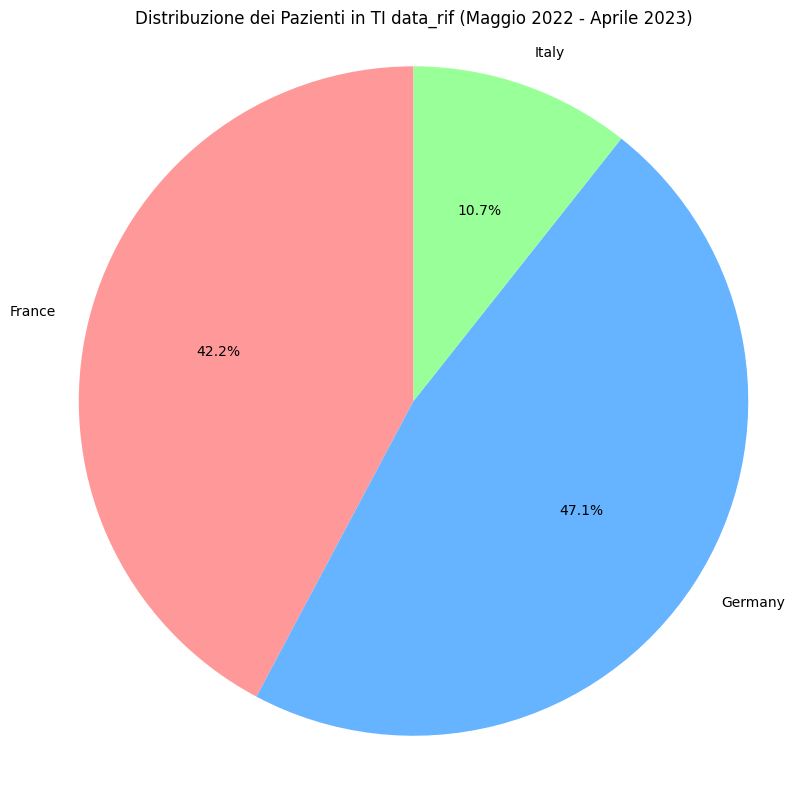

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])
df_filtrato = df[(df['location'].isin(['Italy', 'Germany', 'France']))]
df_filtrato = df_filtrato[(df_filtrato['date'] >= '2022-05-01') & (df_filtrato['date'] <= '2023-04-30')]
somma_ti = df_filtrato.groupby('location')['icu_patients'].sum().reset_index()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(somma_ti['icu_patients'], labels=somma_ti['location'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribuzione dei Pazienti in TI data_rif (Maggio 2022 - Aprile 2023)')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [83]:
##RIGUARDO LE NAZIONI DI ITALIA GERMANIA FRANCIA E SPAGNA 2023 MOSTRARE LA SOMMA DEI PAZIENTI OSPITALIZZATI PER OGNUNA
#SE CI SONO DATI NULLI SUGGERIRE SE PUO ESSERE POSSIBILE GESTIRLI TRAMITE SOSTITUZIONE O MENO

In [127]:
import pandas as pd
#QUESTA è LA RISPOSTA
df4naz = df.loc[(df["location"] == "Italy") | (df["location"] == "Germany") | (df["location"] == "France")| (df["location"] == "Spain")]
df4nazcontr = df4naz[["location", "hosp_patients"]]
# Calcola la somma dei pazienti ospedalizzati per ciascuna location
df_sum_hosp_patients = df4nazcontr.groupby("location")["hosp_patients"].sum()

# Mostra il DataFrame risultante
print(df_sum_hosp_patients)
#DATO CHE LA GERMANIA SEMBRA CHE NON ABBIA LA COLONNA HOSP_PATIENCE VALORIZZATA
#SAREBBE BUONA NORMA AVERE UN VALORE DI RIFERIMENTO SUDDIVISO PER ANNO
#DI SEGUITO COME HO TROVATO LA MANCATA VALORIZZAZIONE: 
dfgermany= df.loc[(df["location"] == "Germany")]
dfgermany = dfgermany.loc[(dfgermany["hosp_patients"]>0)]


location
France     19367212.0
Germany           0.0
Italy      13481707.0
Spain       6472838.0
Name: hosp_patients, dtype: float64


In [125]:
dfgermany.loc[(dfgermany["hosp_patients"] > 0)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
